In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/NLP/Textual-LSD

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/NLP/Textual-LSD


In [16]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/NLP/Textual-LSD")
# os.getcwd()

In [17]:
!git config --global user.email "b.billuroglu@gmail.com"
!git config --global user.name "BerokenScientist"

In [18]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [7]:
from tkinter.tix import MAX
import torch
import utils
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import torch.nn.functional as F

##### Key Variables #####
# Hashed values are those used in the reference paper
EPOCHS = 30 #Until convergence
BATCH_SIZE = 128 
LR = 3e-4 #2e-5
USE_DOM = True
FILENAME = 'Datasets/train_balanced.xlsx'
VAL_FILENAME= "Datasets/validation_bal_3Apr.xlsx"
TEST_FILENAME= "Datasets/test_bal_3Apr.xlsx"
ATTENTION_HEADS = 8
EMBEDDING_SIZE = 32
NUM_ENCODER_LAYERS = 1 
FORWARD_XP = 16
DROPOUT = 0.45
MAXLENGTH = 128
MT_HEADS = 8
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using ', DEVICE)

PRINT_STEP = 25
SAVE_STEP = 10
w2v = torch.load('w2v_window10_min0_iter20.pkl')
w2v.requires_grad= False
print(w2v.shape)


Using  cuda
torch.Size([1000, 32])


In [9]:
trainer = utils.Textual_LSD_TVT(verbose=True)
trainer.load_dataset(FILENAME, MAXLENGTH, BATCH_SIZE)#, validation = True)
trainer.load_dataset(TEST_FILENAME, MAXLENGTH, BATCH_SIZE, validation=True)
# trainer.load_dataset(VAL_FILENAME, MAXLENGTH, BATCH_SIZE, validation=True)
trainer.load_vocab('Pickles/NewVocab.pkl')

# trainer.test()

Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Vocab...
training vocab loaded
validation vocab loaded
Successfully Loaded Pickles/NewVocab.pkl into vocabulary


In [10]:
# trainer.generate_models_lstm(EMBEDDING_SIZE,BATCH_SIZE, DROPOUT,USE_DOM, LR, 
                            #  DEVICE, lr_pat=15, w2v=w2v,train=False)

trainer.generate_models(EMBEDDING_SIZE, ATTENTION_HEADS, DROPOUT, USE_DOM,
                        LR, MT_HEADS, NUM_ENCODER_LAYERS, FORWARD_XP, DEVICE, lr_pat=15, w2v = w2v)



# trainer.load_models('w2v_no_dom_models/emb32att8mt8fx16len128drp045dom0eps30epoch30.pt',
                    # lr = LR, train=False)

trainer.train(EPOCHS, PRINT_STEP, SAVE_STEP, enc_version=1,save_epochs=2,validation_freq=1,val_prf=True)
trainer.plot_data(averaging_window=1,validation=True)

# trainer.test()

emb32att8mt8fx16len128drp045dom1
Starting Generate Models...


KeyboardInterrupt: ignored

emb32att8mt8fx16len128drp045dom0
Starting Generate Models...
Models Generated Successfully
Number of batches per epoch: 104
Printing every 25 batches, saving every 10 batches
Epoch 1 / 30
Batch 25 / 104
25 batch average loss: 2.7829896846428057
Batch Accuracy: 27.50%

Batch 50 / 104
25 batch average loss: 2.778822029368701
Batch Accuracy: 28.59%

Batch 75 / 104
25 batch average loss: 2.7774189418219475
Batch Accuracy: 24.06%

Batch 100 / 104
25 batch average loss: 2.777034518905708
Batch Accuracy: 24.77%

Epoch Time: 74.4s

Epoch Accuracy: 25.49%
Accuracy: 25.51%
Accuracy of base quadrant predictions: 25.5063%
Accuracy of VA quadrant predictions: 26.5190%
Confusion matrix of base quadrant predictions: [[ 87. 236.  72.   0.]
 [ 89. 244.  62.   0.]
 [100. 224.  70.   1.]
 [ 79. 241.  73.   2.]]
Confusion matrix of VA quadrant predictions: [[  2. 101. 238.  54.]
 [  2. 100. 237.  56.]
 [  0.  82. 259.  54.]
 [  2.  92. 243.  58.]]
Confusion matrix of valence predictions: [[678. 112.]
 [67

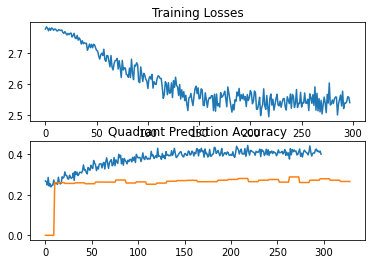

In [ ]:
trainer.generate_models(EMBEDDING_SIZE, ATTENTION_HEADS, DROPOUT, USE_DOM,
                        LR, MT_HEADS, NUM_ENCODER_LAYERS, FORWARD_XP, DEVICE, lr_pat=15)
trainer.train(EPOCHS, PRINT_STEP, SAVE_STEP, enc_version=1,save_epochs=2,validation_freq=1,
              val_prf = True)
trainer.plot_data(averaging_window=1,validation=True)